In [1]:
import gurobipy as grb
from gurobipy import GRB
import scipy.sparse as spr
import numpy as np
import random
import matplotlib.pyplot as plt
#from sympy import symbols, Rational
from IPython.display import display, Math, Markdown
import numpy.ma as m
import networkx as nx
import matplotlib.pyplot as plt

In [100]:
# Dijkstra's Algorithm Implementation

# Example Graph represented as an Adjacency Matrix
B_a = [
    [0, 4, 2, 0, 0],
    [4, 0, 1, 5, 0],
    [2, 1, 0, 8, 10],
    [0, 5, 8, 0, 2],
    [0, 0, 10, 2, 0],

]



In [101]:
num_z ,_ = np.shape(B_a)

In [102]:
λ_a = np.random.choice([1,2,4,.5,.25], size = [num_z, num_z]) * ( np.array(B_a) > 0)
λ_a = [[λ_a[j][i] if j < i else λ_a[i][j] for j in range(len(λ_a))] for i in range(len(λ_a))]
λ_a= np.array(λ_a)

# λ_a = np.array(λ_a) > 0

In [103]:
L_z = np.tril(np.ones((num_z, num_z)))
B_a = (np.divide( B_a,λ_a, where= ( λ_a > 0) ))* L_z + (1- L_z)* B_a
λ_a =(np.divide( 1,λ_a, where= ( λ_a > 0) )) * L_z + (1- L_z)* λ_a

In [104]:
λ_a

array([[0.  , 2.  , 4.  , 0.  , 0.  ],
       [0.5 , 0.  , 2.  , 2.  , 0.  ],
       [0.25, 0.5 , 0.  , 0.5 , 4.  ],
       [0.  , 0.5 , 2.  , 0.  , 0.25],
       [0.  , 0.  , 0.25, 4.  , 0.  ]])

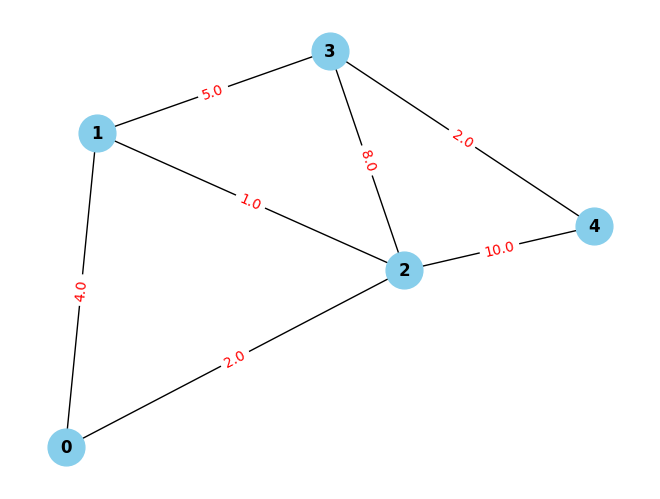

In [27]:
G = nx.Graph()

# Add nodes
G.add_nodes_from(range(len(B_a)))

# Add edges with weights
for i in range(len(B_a)):
    for j in range(i + 1, len(B_a[i])):
        if B_a[i][j] > 0:
            G.add_edge(i, j, weight=B_a[i][j])

# Draw the B_a
pos = nx.spring_layout(G)  # Set layout for better visualization
nx.draw(G, pos, with_labels=True, font_weight='bold', node_size=700, node_color='skyblue', font_color='black')

# Add edge labels
edge_labels = {(i, j): B_a[i][j] for i in range(len(B_a)) for j in range(i + 1, len(B_a[i])) if B_a[i][j] > 0}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')

# Display the B_a
plt.show()

In [39]:
# Number of vertices in the B_a
num_z = len(B_a)

# Initialize p_z and visited array
p_z = [float('inf')] * num_z
p_z = np.array(p_z)
visited = [False] * num_z

# Starting vertex
start_vertex = 0
p_z[start_vertex] = 0

# Dijkstra's Algorithm
for _ in range(num_z):
    # Find the vertex with the minimum distance that has not been visited
    min_p_z = float('inf')
    min_p_z_id = -1
    for v in range(num_z):
        if not visited[v] and p_z[v] < min_p_z:
            min_p_z = p_z[v]
            min_p_z_id = v
    print(min_p_z_id)
    # Mark the selected vertex as visited
    visited[min_p_z_id] = True

    # Update p_z for neighboring vertices
    for v in range(num_z):
        if (
            not visited[v] and 
            B_a[min_p_z_id][v] > 0 and 
            p_z[min_p_z_id] * λ_a[min_p_z_id][v] + B_a[min_p_z_id][v] < p_z[v]
        ):
            p_z[v] = p_z[min_p_z_id] * λ_a[min_p_z_id][v] + B_a[min_p_z_id][v]


0
2
1
3
4


In [40]:
print("Shortest distances from vertex", start_vertex)
for v in range(num_z):
    print("To vertex", v, ":", p_z[v])

Shortest distances from vertex 0
To vertex 0 : 0.0
To vertex 1 : 4.0
To vertex 2 : 2.0
To vertex 3 : 10.0
To vertex 4 : 14.0


In [41]:
λ_a

array([[0.  , 2.  , 0.25, 0.  , 0.  ],
       [0.5 , 0.  , 0.25, 4.  , 0.  ],
       [4.  , 4.  , 0.  , 1.  , 2.  ],
       [0.  , 0.25, 1.  , 0.  , 4.  ],
       [0.  , 0.  , 0.5 , 0.25, 0.  ]])

In [48]:
path = [4]
current = 4
start_vertex = 0 
iter = 0 
while current != start_vertex:
    # Backtrack to the previous node with minimum distance
    print(current)
   
    min_vertex = min(range(num_z), key=lambda v: p_z[v] * λ_a[v,current] + np.array(B_a)[v,current]  if np.array(B_a)[v,current] > 0 else  np.inf)
    path.insert(0, min_vertex)
    current = min_vertex
    iter += 1
    if iter > num_z:
        break

arcs = [(path[i], path[i + 1]) for i in range(len(path) - 1)]

4
2


In [49]:
path 

[0, 2, 4]

In [50]:
mu_a = np.zeros_like(B_a)
for arc in arcs:
    mu_a[arc] = 1

In [51]:
mu_a

array([[0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [52]:
p_z = np.array(p_z)
((B_a + λ_a *p_z[:,None] -  p_z) * mu_a).sum()

0.0

In [53]:
(B_a + λ_a *p_z[:,None] -  p_z) * (B_a > 0)

array([[ 0.  ,  0.  ,  0.  , -0.  , -0.  ],
       [ 4.  , -0.  ,  0.  , 11.  , -0.  ],
       [10.  ,  8.  , -0.  ,  0.  ,  0.  ],
       [ 0.  , -0.25, 10.  , -0.  , 28.  ],
       [ 0.  , -0.  ,  7.5 , -4.5 , -0.  ]])

In [574]:
(B_a + λ_a *p_z[:,None] -  p_z) * mu_a

array([[ 0. ,  2.5,  0. , -0. , -0. ],
       [ 0. , -0. ,  0. ,  0. , -0. ],
       [ 0. ,  0. , -0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. , -0. , 11. ],
       [ 0. , -0. ,  0. , -0. , -0. ]])

In [68]:
(B_a + λ_a *p_z[:,None] -  p_z)

array([[ 0.       ,  2.5      ,  0.       , -1.625    , -2.40625  ],
       [ 2.75     , -1.5      , -0.625    ,  9.375    , -2.40625  ],
       [10.       , 10.5      , -2.       ,  8.375    , 11.59375  ],
       [ 0.       ,  0.15625  ,  1.625    , -1.625    ,  6.09375  ],
       [ 0.       , -1.5      ,  1.703125 ,  0.9765625, -2.40625  ]])

In [590]:
λ_a

array([[0.  , 1.  , 1.  , 0.  , 0.  ],
       [1.  , 0.  , 2.  , 0.5 , 0.  ],
       [1.  , 0.5 , 0.  , 4.  , 2.  ],
       [0.  , 2.  , 0.25, 0.  , 4.  ],
       [0.  , 0.  , 0.5 , 0.25, 0.  ]])

In [54]:
B_a[3,4] + λ_a[3,4]* p_z[3] - p_z[4]

28.0

In [55]:
B_a[4,3]+ λ_a[4,3]* p_z[4] - p_z[3]

-4.5

In [56]:
B_a[3,4]

2.0

In [57]:
λ_a[3,4]

4.0

In [58]:
p_z[4]

14.0

In [603]:
B_a[4,3]

0.5

In [604]:
λ_a[4,3]

0.25

# auction

In [26]:
B_a =np.array( # Example Graph represented as an Adjacency Matrix
[
    [0, 4, 2, 0, 0],
    [4, 0, 1, 5, 0],
    [2, 1, 0, 8, 10],
    [0, 5, 8, 0, 2],
    [0, 0, 10, 2, 0],

]
)
num_z,_ = B_a.shape

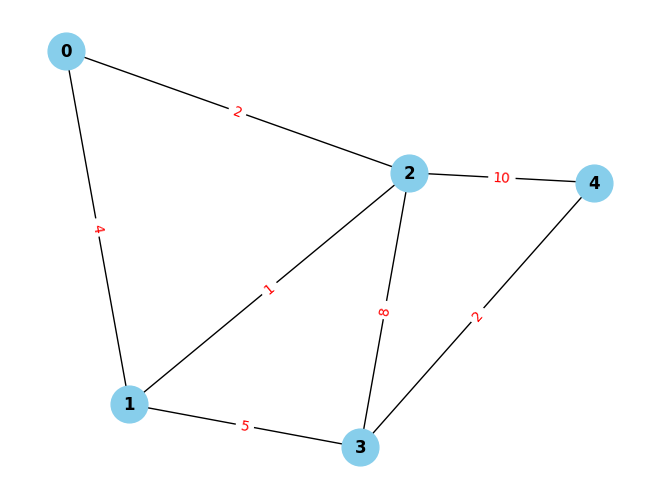

In [3]:
G = nx.Graph()

# Add nodes
G.add_nodes_from(range(len(B_a)))

# Add edges with weights
for i in range(len(B_a)):
    for j in range(i + 1, len(B_a[i])):
        if B_a[i][j] > 0:
            G.add_edge(i, j, weight=B_a[i][j])

# Draw the B_a
pos = nx.spring_layout(G)  # Set layout for better visualization
nx.draw(G, pos, with_labels=True, font_weight='bold', node_size=700, node_color='skyblue', font_color='black')

# Add edge labels
edge_labels = {(i, j): B_a[i][j] for i in range(len(B_a)) for j in range(i + 1, len(B_a[i])) if B_a[i][j] > 0}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')

# Display the B_a
plt.show()

In [96]:
λ_a = np.random.choice([1,2,4,.5,.25], size = [num_z, num_z]) * ( np.array(B_a) > 0)
#λ_a = [[λ_a[j][i] if j < i else λ_a[i][j] for j in range(len(λ_a))] for i in range(len(λ_a))]
λ_a= np.array(λ_a)


In [93]:
λ_a 

array([[0.  , 2.  , 0.5 , 0.  , 0.  ],
       [1.  , 0.  , 0.5 , 4.  , 0.  ],
       [1.  , 0.5 , 0.  , 4.  , 1.  ],
       [0.  , 0.5 , 1.  , 0.  , 4.  ],
       [0.  , 0.  , 2.  , 0.25, 0.  ]])

In [113]:
λ_a =  (B_a >0)

In [114]:
terminal = 0
origin = 4
p_z = np.zeros(num_z)
path = [terminal]
iter =0 
while path[-1] != origin and iter < 300:
    iter += 1
    print(path)
    print(p_z)
    i = path[-1]
    tightest_j = -1
    tightest_d_j = np.inf
    for j in np.where(B_a[:,i]>0)[0]:
        d_j = B_a[j,i] + λ_a[j,i] * p_z[j]
        if d_j < tightest_d_j:
            tightest_d_j =  d_j
            tightest_j = j
    # print(tightest_d_j)
    # print(p_z[i])
    # print(p_z[i] < tightest_d_j )
    if p_z[i] < tightest_d_j:
        p_z[i] = tightest_d_j
        if i != terminal:
            path.pop()

    else:
        path.append(tightest_j)

        
            

[0]
[0. 0. 0. 0. 0.]
[0]
[2. 0. 0. 0. 0.]
[0, 2]
[2. 0. 0. 0. 0.]
[0]
[2. 0. 1. 0. 0.]
[0]
[3. 0. 1. 0. 0.]
[0, 2]
[3. 0. 1. 0. 0.]
[0, 2, 1]
[3. 0. 1. 0. 0.]
[0, 2]
[3. 2. 1. 0. 0.]
[0]
[3. 2. 3. 0. 0.]
[0]
[5. 2. 3. 0. 0.]
[0, 2]
[5. 2. 3. 0. 0.]
[0, 2, 1]
[5. 2. 3. 0. 0.]
[0, 2]
[5. 4. 3. 0. 0.]
[0]
[5. 4. 5. 0. 0.]
[0]
[7. 4. 5. 0. 0.]
[0, 2]
[7. 4. 5. 0. 0.]
[0, 2, 1]
[7. 4. 5. 0. 0.]
[0, 2]
[7. 5. 5. 0. 0.]
[0]
[7. 5. 6. 0. 0.]
[0]
[8. 5. 6. 0. 0.]
[0, 2]
[8. 5. 6. 0. 0.]
[0, 2, 1]
[8. 5. 6. 0. 0.]
[0, 2, 1, 3]
[8. 5. 6. 0. 0.]
[0, 2, 1]
[8. 5. 6. 2. 0.]
[0, 2]
[8. 7. 6. 2. 0.]
[0]
[8. 7. 8. 2. 0.]
[0]
[10.  7.  8.  2.  0.]
[0, 2]
[10.  7.  8.  2.  0.]
[0, 2, 1]
[10.  7.  8.  2.  0.]
[0, 2, 1, 3]
[10.  7.  8.  2.  0.]


In [115]:
(B_a + λ_a *p_z[:,None] -  p_z) .round(2)

array([[-10.,   7.,   4.,  -2.,   0.],
       [  1.,  -7.,   0.,  10.,   0.],
       [  0.,   2.,  -8.,  14.,  18.],
       [-10.,   0.,   2.,  -2.,   4.],
       [-10.,  -7.,   2.,   0.,   0.]])

In [116]:
path = path[::-1]
arcs = [(path[i], path[i + 1]) for i in range(len(path) - 1)]
mu_a = np.zeros_like(B_a)
for arc in arcs:
    mu_a[arc] = 1

In [117]:
mu_a

array([[0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0]])

In [118]:
(B_a + λ_a *p_z[:,None] -  p_z) * mu_a

array([[-0.,  0.,  0., -0.,  0.],
       [ 0., -0.,  0.,  0.,  0.],
       [ 0.,  0., -0.,  0.,  0.],
       [-0.,  0.,  0., -0.,  0.],
       [-0., -0.,  0.,  0.,  0.]])

In [109]:
p_z

array([4., 3., 4., 0., 0.])

In [111]:
(B_a + λ_a *p_z[:,None] -  p_z) * B_a

array([[ -0.,  36.,   0.,   0.,   0.],
       [  6.,  -0.,   0.,  85.,   0.],
       [  0.,   0.,  -0.,  96., 120.],
       [ -0.,  10.,  32.,   0.,   4.],
       [ -0.,  -0.,  60.,   4.,   0.]])